# 第5章 基础类型和操作
既然你已经见识了类和对象是如何工作的，现在可以更深入地了解一下Scala的基础类型和操作。如果你熟悉Java，你会很高兴地看到Java的基础类型和操作符在Scala中有相同的含义。不过，即便对于有经验的Java开发者，本章会讲到那些很有趣的差异点，值得一读。由于本章涉及的部分内容本质上跟Java相同，我们在相关内容中穿插了备注，告诉Java开发人员哪些章节是可以安全跳过的。

在本章，你将概括地了解Scala的基础类型，包括S t r i n g，以及值类型Int、Long、Short、Byte、Float、Double、Char和Boolean。你会了解这些类型支持的操作，包括Scala表达式的操作符优先级。你还将了解到隐式转换是如何“增强”（enrich）这些基础类型，给你Java原生支持以外的额外操作的。

## 5.1 一些基础类型
表5.1列出了Scala的一些基础类型和这些类型的实例允许的取值范围。Byte、Short、Int、Long和Char类型统称为整数类型（integral type）。整数类型加上Float和Double称作数值类型（numeric types）。

除了位于java.lang的String，表5.1列出的所有类型都是scala包的成员。[1]例如，Int的完整名称是scala.Int。不过，由于scala包和java. lang包的所有成员在Scala源文件中都已自动引入，可以在任何地方使用简单名称（即Boolean、Char、String等）。

*表5.1 一些基础类型*
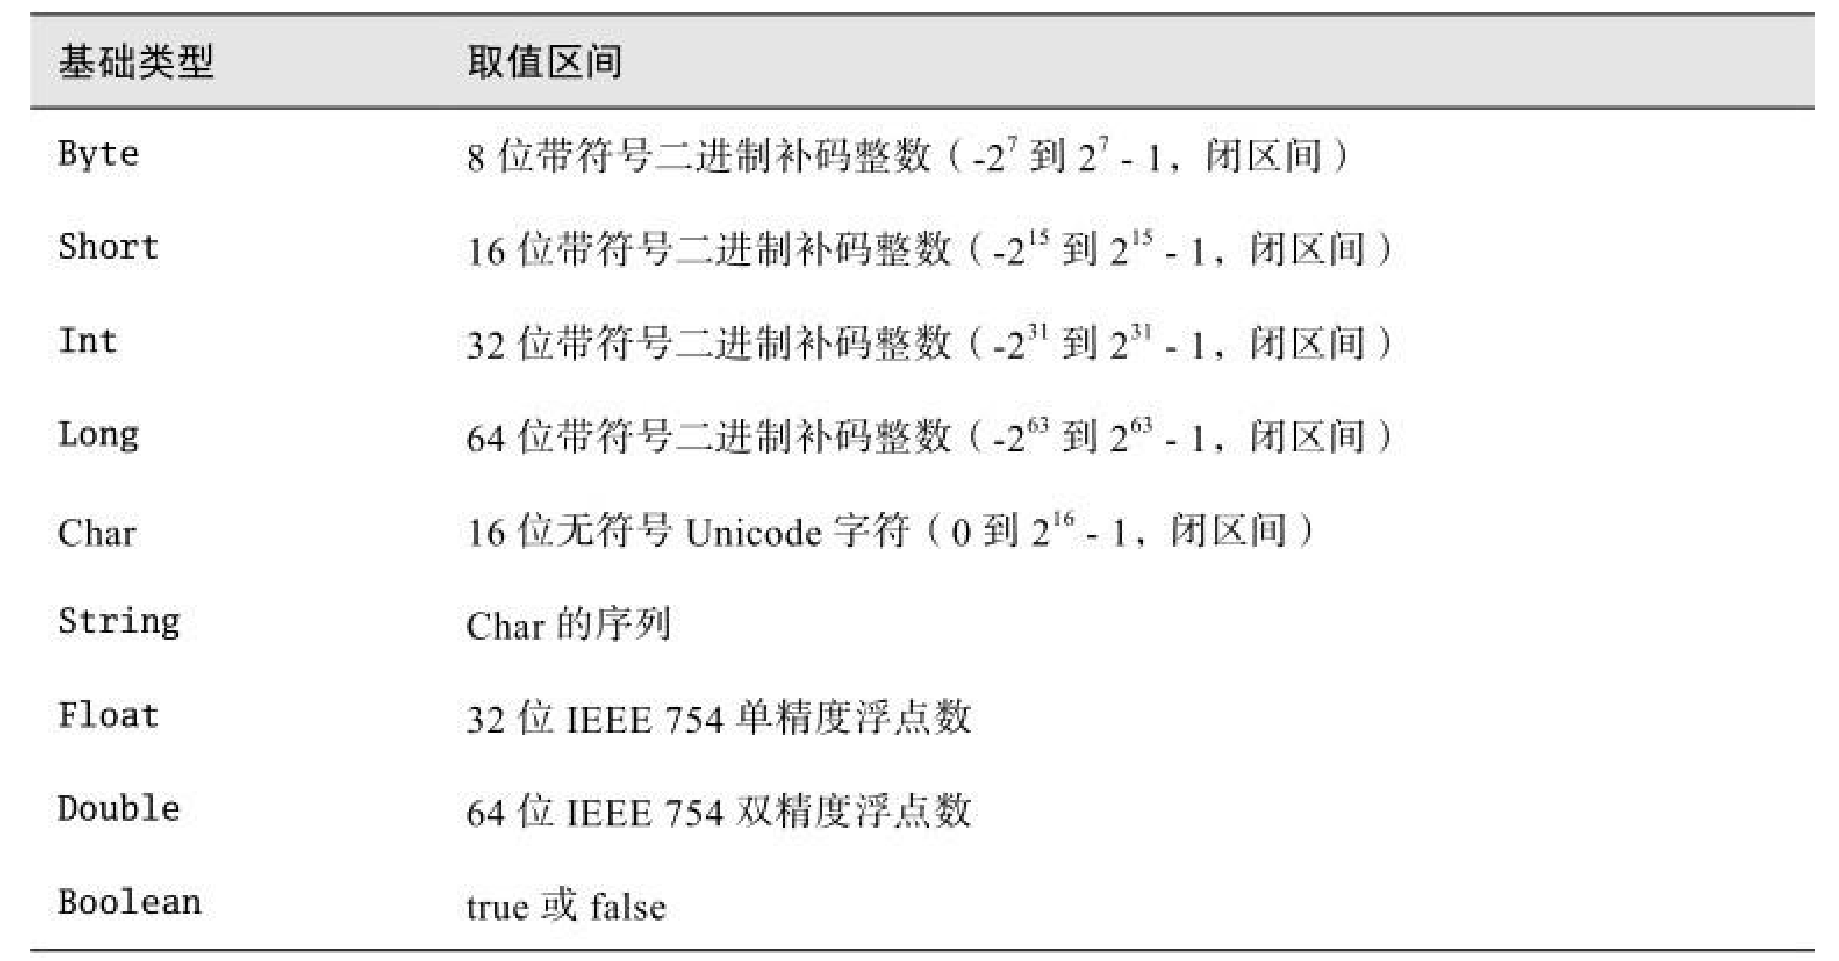

资深Java程序员可能已经注意到，Scala的基础类型跟Java中对应的类型取值区间完全相同，这使得Scala编译器可以在产出的字节码中将Scala的值类型（value types），比如Int或Double的实例转换成Java的基本类型（primitive type）。

## 5.2 字面量
表5.1中列出的所有基础类型抖可以用字面量（literal）来书写。字面量是在代码中直接写入常量值的一种方式。

**Java程序员的快速通道**

本节中展示的大部分字面量的预发跟Java完全一致，如果你是Java大师，可以安全地跳过本节的绝大部分内容。你需要读一读的是Scala原生字符串和符号的字面量（74页开始）以及字符串插值（77页开始）。还有就是Scala并不支持八进制字面量和以0开头的整数字面量，比如031，将无法编译通过。

**整数字面量**

用于Int、Long、Short和Byte的整数字面量有两种形式：十进制的和十六进制的。整数字面量的不同开头表示了不同的进制。如果是以0x或0X开头，意味着这是十六进制的数，可以包含0到9以及大写或小写的A到F表示的数字。例如：

In [1]:
val hex = 0x5
val hex2 = 0x00FF
val magic = 0xcafebabe

hex: Int = 5
hex2: Int = 255
magic: Int = -889275714

注意，Scala的shell总是以十进制打印整数值，不论是用哪种形式来初始化的。因此解释器把用字面量0x00FF初始化的变量hex2显示为十进制的255 （当然，不必盲目相信我们说的，感受Scala的好方法是一边读一边在解释器中尝试这些语句）。如果字面量以非0的数字打头，且除此之外没有其他修饰，那么它就是十进制的。例如：

In [ ]:
val dec1 = 31
val dec2 = 255
val dec3 = 20

如果整数字面量以L或l结尾，那么它就是Long型的，否则就是Int。一些Long型的整数字面量如下：

In [ ]:
val prog = 0XCAFEBABEL
val tower = 35L
val of = 31l

如果一个Int型的字面量被赋值给一个类型为Short或Byte的变量，该字面量会被当作Short或Byte类型，只要这个字面量的值在对应类型的合法取值区间即可。例如：

In [ ]:
val little: Short = 367
val littlter: Byte = 38

**浮点数字面量**
浮点数字面量由十进制的数字、可选的小数点（decimal point），以及后续一个可选的E或e打头的指数（exponent）组成。一些浮点数字面量如下：

In [ ]:
val big = 1.2345
val bigger = 1.2345e1
val biggerStill = 123E45

注意，指数部分指的是对前一部分乘以10的多少次方。因此，1.2345e1等于1.2345乘以101，即12.345。如果浮点数字面量以F或f结尾，那它就是Float型的；否则它就是Double。Double型的浮点数字面量也可以以D或d结尾，但这是可选的。一些Float字面量如下：

In [ ]:
val little = 1.2345F
val littleBigger = 3e5f

如果要以Double来表示最后这个浮点数值，可以用下面（或其他）的形式：

In [ ]:
val anotherDoble = 3e5
val yetAnother = 3e5D

**字符字面量**  
字符字面量（character literal）由一对单引号和中间的任意Unicode字符组成，例如：

In [ ]:
val a = 'A'

除了显式地给出原字符，也可以用字符的Unicode码来表示。具体写法是\u加上Unicode码对应的四位的十六进制数字，如：

In [ ]:
val d = '\u0041'
val f = '\u0044'

事实上，这样的Unicode字符可以出现在Scala程序的任何位置。比如说，可以像这样命名一个标识符（变量）：
**在新版scala中可能不行**

In [ ]:
val B\u0041\u0044 = 1

这个标识符跟BAD一样处理，也就是将上述Unicode码解开后的结果。通常来说，把标识符命名成这样并不好，因为不易读。这样的语法规则存在，本意是让包含非ASCII的Unicode字符的Scala源文件可以用ASCII表示。

最后，还有一些字符字面量是由特殊的转义序列来表示的，如表5.2所示。例如：

In [ ]:
val backslash = '\\'
println(backslash)

表5.2 特殊字符转义序列
字符串字面量
字符串字面量由双引号包起来的字符组成：
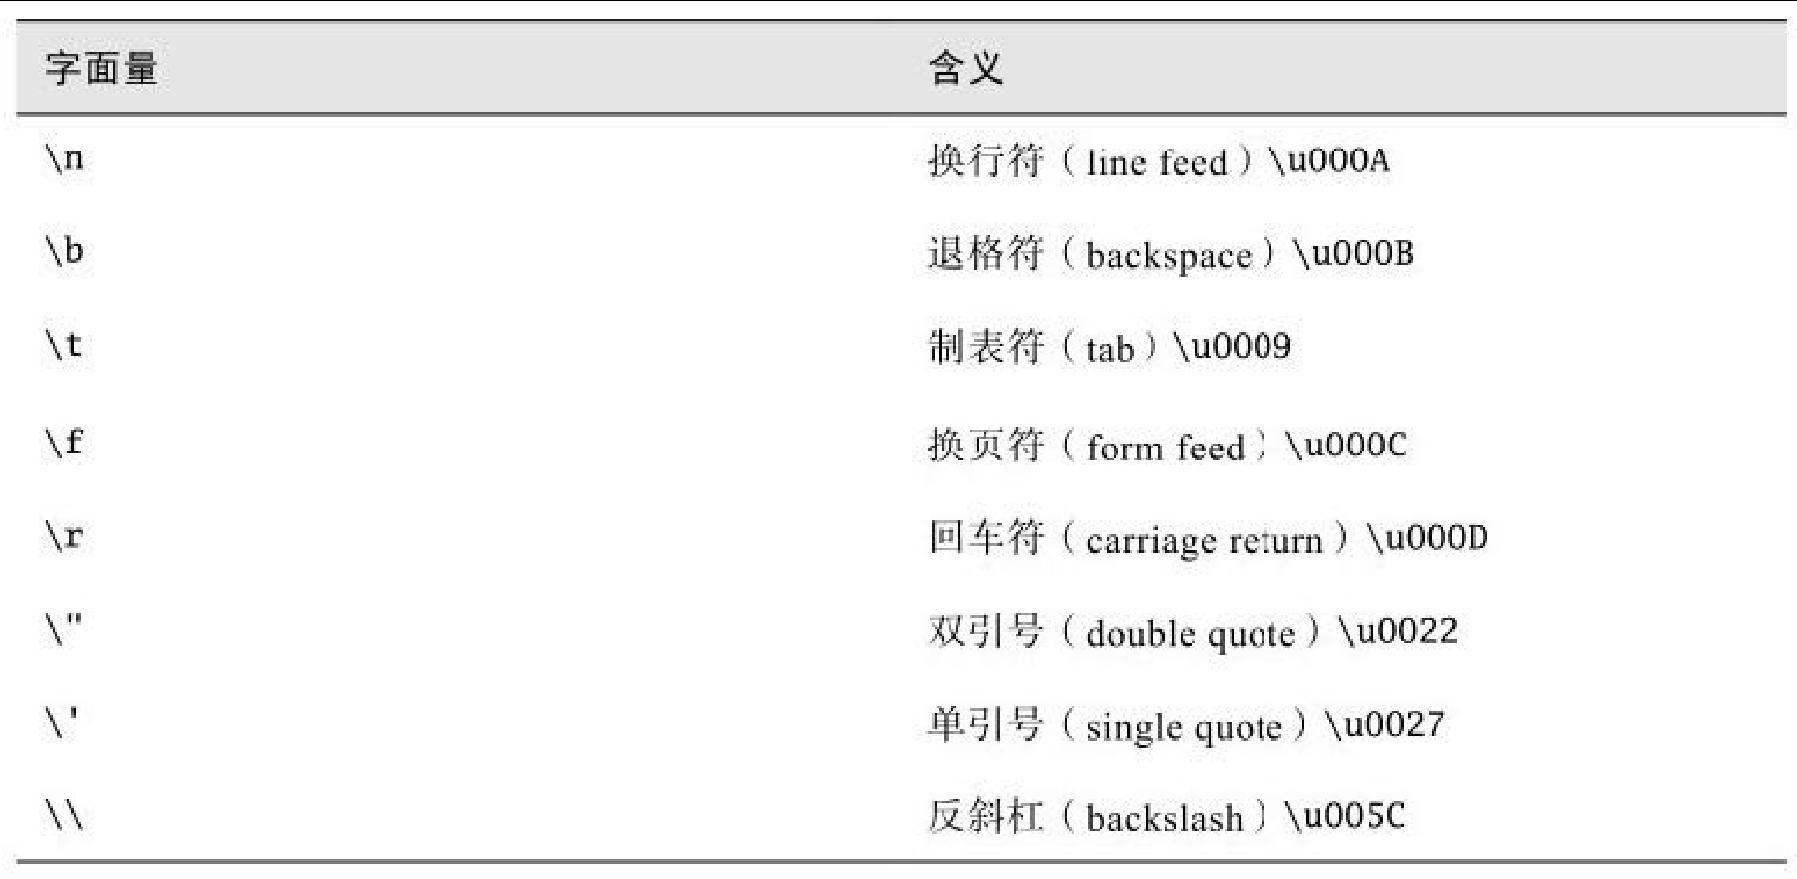


**字符串字面量**  
字符串字面量由双引号包起来的字符组成：

In [ ]:
val hello = "hello"

双引号中字符的语法跟字符字面量一样。比如：

In [ ]:
val escapes = "\\\"\'"
println(escapes)

由于这个语法对那些包含大量转义序列或者跨多行的字符串而言比较别扭，Scala支持一种特殊的语法来表示原生字符串（raw string）。可以用三个双引号（＂＂＂）开始并以三个双引号（＂＂＂）结束来表示原生字符串。原生字符串内部可以包含任何字符，包括换行、单双引号和其他特殊字符。当然，连续三个双引号的情况除外。例如，如下程序就是用原生字符串来打印一条消息：

In [ ]:
println("""Welcome to Ultamix 3000.
            Type "HELP" for help.""")

不过，运行这段代码并不会产生跟我们想要的完全一致的输出：
这里的问题是字符串第二行前面的空格被包含在了字符串里！为了处理这个常见的情况，可以对字符串调用stripMargin方法。具体做法是在每一行开始加一个管道符（|），然后对整个字符串调用stripMargin：

现在这段代码满足我们的要求了：

In [ ]:
println("""|Welcome to Ultamix 3000.
           |Type "HELP" for help.""".stripMargin)

**符号字面量**  
符号字面量（symbol literal）的写法是＇ident，其中ident可以是任何由字母和数字组成的标识符。这样的字面量会被映射成scala.Symbol这个预定义类的实例。确切地说，字面量＇cymbal会被编译器展开成一个工厂方法的调用：Symbol（＂cymbal＂）。符号字面量通常用在那些在动态类型语言中用来当作标识符的场合。比如，你可能想要定义一个更新数据库记录的方法：

In [ ]:
def updateRecordByName(r: Symbol,value: Any) = {
    println("updated")
}

这个方法以参数的形式接收一个符号和一个值，分别表示记录中要更新的字段和值。在动态类型语言中，可以传入一个未声明的字段标识符来调用这个方法，但在Scala中这样是行不通的：

In [ ]:
updateRecordByName(favoriteAlbum, "OK Computer")

不过，可以传入一个符号字面量，几乎（跟动态语言）同样精简：

In [ ]:
updateRecordByName('favoriteAlbum, "OK Computer")

对于符号，你能做的不多，除了获取它的名称：
另一个值得注意的点是符号会被内部化。[2]如果同样的符号字面量出现两次，这两次引用都会指向同一个Symbol对象。

In [ ]:
val s = 'aSymbol
val nm = s.name

**布尔值字面量**  
类型Boolean有两个字面量，true和false：

In [ ]:
val bool = true
val fool = false

关于字面量的内容就这些。从“字面”上讲，你已经是Scala的专家了。

## 5.3 字符串插值
Scala包括了一个灵活的机制来支持字符串插值，允许你在字符串字面量中嵌入表达式。最常见的用途是为字符串拼接提供一个更精简和易读的替代方案。举个例子：  
表达式s＂Hello, \\$name!＂是一个被处理的（processed）字符串字面量。由于字母s出现在首个双引号前，Scala将使用s这个字符串插值器来处理该字面量。s插值器会对内嵌的每个表达式求值，对求值结果调用toString，替换掉字面量中的那些表达式。因此，s＂Hello, \\$name!＂会交出＂Hello， reader!＂，跟＂Hello, ＂ + name + ＂!＂的结果一样。  
在被处理的字符串字面量中，可以随时用美元符（$）开始一个表达式。对于那些单变量的表达式，通常可以在美元符后面直接给出变量的名字。Scala将把从美元符开始到首个非标识符字符的部分作为表达式。如果表达式包含了非标识符字符，就必须将它放在花括号中，左花括号需要紧跟美元符。例如：


In [ ]:
s"The answer is ${6 * 7}"

Scala默认还提供了另外两种字符串插值器：raw和f。raw字符串插值器的行为跟s类似，不过它并不识别字符转义序列（比如表5.2给出的那些）。举例来说，如下语句将打印出四个反斜杠，而不是两个：

In [ ]:
println(raw"No\\\\escape!")

f字符串插值器允许你给内嵌的表达式加上printf风格的指令。需要将指令放在表达式之后，以百分号（%）开始，使用java.util.Formatter中给出的语法。比如，可以这样来格式化π：

In [ ]:
f"${math.Pi}%.5f"

如果不对内嵌表达式给出任何格式化指令，f字符串插值器将默认使用%s，其含义是用toString的值来替换，就像s字符串插值器那样。例如：

In [ ]:
val pi = "Pi"
f"$pi is approximately ${math.Pi}%.8f."

在Scala中，字符串插值是通过在编译期重写代码来实现的。编译器会将任何由某个标识符紧接着字符串字面量的（左）双引号这样的表达式当作字符串插值器表达式处理。我们前面看到的字符串插值器s、f和raw，就是通过这个通用的机制实现的。类库作者和用户可以定义其他字符串插值器来满足不同的用途。

## 5.4 操作符即方法
Scala给它的基础类型提供了一组丰富的操作符。我们前面的章节也提到过，这些操作符实际上只是普通方法调用的漂亮语法。例如，1 + 2实际上跟1.+（2）是一回事。换句话说，Int类包含了一个名为+的方法，接收一个Int参数，返回Int的结果。这个+方法是在你对两个Int做加法时执行的：

In [ ]:
val sum = 1 + 2 //Scala 将调用1.+(2)

要验证这一点，可以用方法调用的形式显式地写出这个表达式：

In [ ]:
val sumMore = 1.+(2)

事实上，Int包含了多个重载（overloaded）的+方法，分别接收不同的参数类型。[3]例如，Int还有另一个也叫+的方法，接收一个Long，返回一个Long。如果你对一个Int加上一个Long，那么后一个+方法会被调用，如：

In [ ]:
val longSum = 1 + 2L

+符号是一个操作符（更确切地说是一个中缀操作符）。操作符表示法并不局限于那些在其他语言中看上去像操作符的那些方法。可以在操作符表示法中使用任何方法。例如，String类有一个indexOf方法，接收一个Char参数。这个indexOf方法检索字符串中给定字符首次出现的位置，返回位置下标，如果没有找到，则返回-1。你可以像操作符那样使用indexOf：

In [ ]:
val s = "Hello, world!"
s indexOf 'o'
s.indexOf('o')

除此之外，String还提供了一个重载的indexOf方法，接收两个参数，分别是要查找的字符和开始检索的下标位置（之前提到的另外那个indexOf方法从下标零开始检索，也就是从String的最开始算起）。虽然这个indexOf方法接收两个参数，也可以用操作符表示法。不过只要是用操作符表示法来调用多个参数的方法，都必须将这些参数放在圆括号里。以下是展示如何把（两个参数的）indexOf方法当作操作符来使用的例子：

In [ ]:
s indexOf('o', 5) //scala将调用s.indexOf('o',5)

**任何方法都可以是操作符**  
在Scala中，操作符并不是特殊的语法，任何方法都可以是操作符。当你写下“s.indexOf（＇o＇）”时，indexOf并不是操作符；但当你写下“s indexOf ＇o＇”时，indexOf就是操作符了，因为你用的是操作符表示法。

至此，你已经看到了中缀操作符表示法的若干示例，中缀操作符表示法意味着被调用的方法名位于对象和你想传入的参数中间，比如“7 + 2”。Scala还提供了另外两种操作符表示法：前缀和后缀。在前缀表示法中，需要将方法名放在你要调用的方法的对象前面（比如“-7”中的“-”）。在后缀表示法中，需要将方法名放在对象之后（比如“7 toLong”中的“toLong”）。

跟中缀操作符表示法（操作符接收两个操作元，一个在左一个在右）不同，前缀和后缀操作符是一元的（unary）：它们只接收一个操作元。在前缀表示法中，操作元位于操作符的右侧。前缀操作符的例子有-2.0、!found和～0xFF等。跟中缀操作符类似，这些前缀操作符也是调用方法的一种简写。不同的是，方法名称是“unary_”加上操作符。举例来说，Scala会把-2.0这样的表达式转换成如下的方法调用：“（2.0）.unary_-”。可以自己演示一下，先后用操作符表示法和显式方法调用来完成：


In [ ]:
-2.0
2.0.unary_-

唯一能被用作前缀操作符的是+、-、！和～。因此，如果你定义了一个名为unary_！的方法，可以对满足类型要求的值或变量使用前缀操作符表示法，比如！p。不过如果你定义一个名为unary_*的方法，就不能用前缀操作符表示法了，因为*并不是可以用作前缀操作符的四个标识符之一。可以像正常的方法调用那样调用p.unary_*，但如果你尝试用*p这样的方式来调用，Scala会当作*.p来解析，这大概并不是你想要的效果！[4]

后缀操作符是那些不接收参数并且在调用时没有用英文句点圆括号的方法。在Scala中，可以在方法调用时省去空的圆括号。从约定俗成的角度讲，如果方法有副作用的时候保留空的圆括号，比如println（）；而在方法没有副作用时则可以省掉这组圆括号，比如对String调用toLowerCase时：

In [ ]:
val s = "Hello, world!"
s.toLowerCase

在后一种不带参数的场景（无副作用）下，可以选择去掉句点，使用后缀操作符表示法：**(新版Scala不行)**

In [ ]:
s toLowerCase

在本例中，toLowerCase被当作后缀操作符作用在了操作元s上。

综上所述，要了解Scala基础类型支持的操作符，只需在Scala API文档中查看对应类型声明的方法。不过，由于这是一本Scala教程，我们将在接下来的几节中快速地带你过一遍这些方法当中的大多数。

**Java程序员的快速通道**  
本章剩余部分讲到的Scala知识点跟Java是一致的。如果你是Java大牛，且时间有限，可以安全地跳过，直接进入5.8节（86页），这一节会介绍在对象相等性方面Scala跟Java的不同。

## 5.5 算术操作
可以通过加法（+）、减法（-）、乘法（*）、除法（/）和取余数（%）的中缀操作符表示法对任何数值类型调用算术方法。以下是一些示例：

In [ ]:
1.2 + 2.3
3 - 1
'b' - 'a'
2L * 3L
11 / 4
11 % 4
11.0f /4.0f
11.0 % 4.0

当左右两个操作元都是整数类型（Int、Long、Byte、Short或Char）时，/操作符会计算出商的整数部分，不包括任何余数。%操作符表示隐含的整数除法操作后的余数。

你从浮点数的%得到的余数跟IEEE 754标准定义的不同。IEEE 754的余数在计算时用的是四舍五入，而不是截断（truncating），因此跟整数的余数操作很不一样。如果你确实需要IEEE 754的余数，可以调用scala.math的IEEEremainder，比如：

In [ ]:
math.IEEEremainder(11.0, 4.0)

数值类型还提供了一元的前缀操作符+（unary_+方法）和-（unary_-方法），用于表示数值字面量是正数还是负数，比如-3或+4.0。如果你不给出+或-，那么数值字面量会被当作正数。一元操作符+的存在仅仅是为了和一元的-对应，没有任何作用。一元操作符-还可以被用来对变量取负值。例如：

In [ ]:
val neg = 1 + -3
val y = +3
-neg

## 5.6 关系和逻辑操作
可以用关系方法大于（>）、小于（<）、大于或等于（>=）、小于或等于（<=）来比较数值类型的大小，返回Boolean的结果。除此之外，可以用一元的＇!＇操作符（方法unary_!）来对Boolean值取反。例如：

In [ ]:
1 > 2
1 < 2
1.0 <= 1.0
3.5f >= 3.6f
'a' >= 'A'
val untrue = !true

逻辑方法，逻辑与（&&和&）和逻辑或（||和|），以中缀表示法接收Boolean的操作元，交出Boolean的结果。例如：

In [ ]:
val toBe = true
val question = toBe || !toBe
val paradox = toBe && !toBe

&&和||跟Java一样是短路的（short-circuit）：从这两个操作符构建出来的表达式，只会对对结果有决定作用的部分进行求值。换句话说，&&和||表达式的右侧，在左侧已经确定了表达式结果的情况下，并不会被求值。例如，如果&&表达式的左侧求值得到false，那么整个表达式的结果只能是false，因此右侧不会被求值。同理，如果||表达式的左侧求值得到true，那么整个表达式的结果只能是true，因此右侧也不会被求值。

In [ ]:
def salt() = {println("salt");false}
def pepper() = {println("pepper");true}
pepper() && salt()
salt() && pepper()

在第一个表达式中，pepper和salt都被调用了，但在第二个表达式中，只有salt被调用。由于salt返回false，并没有调用pepper的必要。

如果不论什么情况都对右侧求值，可以使用&和|。&方法执行逻辑与操作，|方法执行逻辑或操作，但不会像&&和||那样短路。举例如下：

In [ ]:
salt() & pepper()

**注意**  
你可能会好奇，既然操作符只是方法，短路是如何做到的。通常，所有入参都会在进入方法之前被求值，所以作为方法，逻辑操作符是如何做到不对第二个参数求值的呢？答案是所有Scala方法都有一个机制来延迟对入参的求值，或者干脆不对它们求值。这个机制叫作传名参数（by-name parameter），在9.5节会有详细介绍。

## 5.7 位运算操作
Scala允许你用若干位运算方法对整数类型执行位运算操作。位运算方法有：按位与（&）、按位或（|）和按位异或（^）。[5]一元的位补码操作（～， unary_～方法）对操作元的每一位取反。例如：

In [ ]:
1 & 2
1 | 2
1 ^ 3
~1

第一个表达式，1 & 2，对1（0001）和2（0010）的每一位执行按位与，交出0（0000）。第二个表达式，1 | 2，对同一组操作元的每一位执行按位或，交出3（0011）。第三个表达式，1 ^ 2，对1（0001）和3（0011）的每一位执行按位异或操作，交出2（0010）。最后一个表达式，～1，对1（0001）的每一位取反，交出-2，用二进制表示是个样子的：111111111111111111111111111 11110。

Scala整数类型还提供了三个位移（shift）方法，左移（<<）、右移（>>）和无符号右移（>>>）。当位移方法被用在中缀操作符表示法时，会将左侧的整数值移动右侧整数值的量。左移和无符号右移会自动填充0。而右移会用左侧值的最高位（符号位）来填充。以下是一些示例：

In [ ]:
-1 >> 31
-1 >>> 31
1 << 2

-1用二进制表示是11111111111111111111111111111111。在第一个例子中，-1 >> 31,-1被右移了31位。由于Int是32位的，这个操作实际上将最左边的位一直往右移动，直到它成为最右边的位。[6]由于>>方法在右移过程中用1来填充（因为-1的最左位是1），结果跟原始的左操作元完全一致，32个为1的位，也就是-1。在第二个例子中，-1 >>> 31，最左边的位再次被往右一直移动到最右边，不过这次填充的是0，因此结果是000000000000000000000 00000000001，即1。在最后的示例中，1 << 2，左操作元1被左移了两个位置（用0填充），结果得到00000000000000000000000000000100，即4。

## 5.8 对象相等性
如果你想要比较两个对象是否相等，可以用==或与之相反的！=。举例如下：

In [ ]:
1 == 2
1 != 2
2 == 2

这些操作实际上可以被应用于所有的对象，并不仅仅是基础类型。比如，可以用==来比较列表：

In [ ]:
List(1,2,3) == List(1,2,3)
List(1,2,3) == List(4,5,6)

继续沿着这个方向，还可以比较不同类型的两个对象：
甚至可以拿对象跟null做比较，或者跟可能为null的对象做比较。不会抛出异常：

In [ ]:
1 == 1.0
List(1,2,3) == "hello"

如你所见，==的实现很用心，大部分场合都能返回给你需要的相等性比较的结果。这背后的规则很简单：首先检查左侧是否为null，如果不为null，调用equals方法。由于equals是个方法，你得到的确切比较逻辑取决于左侧参数的类型。由于有自动的null检查，你不必亲自做这个检查。[7]
这种比较逻辑对于不同的对象，只要它们的内容一致，且equals方法的实现也是完全基于内容的情况下，都会交出true答案。举例来说，以下是针对两个碰巧拥有同样的五个字母的字符串的比较：
Scala的==跟Java的不同
在Java中，可以用==来比较基本类型和引用类型。对基本类型而言， Java的==比较的是值的相等性，就跟Scala一样。但是对于引用类型， Java的==比较的是引用相等性（reference equality），意思是两个变量指向JVM的堆上的同一个对象。Scala也提供了用于比较引用相等性的机制，即名为eq的方法。不过，eq和跟它对应的ne只对那些直接映射到Java对象的对象有效。关于eq和ne的完整细节会在11.1节和11.2节给出。关于如何编写一个好的equals方法，请参考第30章。

In [ ]:
("he" + "llo") == "hello"

**Scala的==跟Java的不同**  
在Java中，可以用==来比较基本类型和引用类型。对基本类型而言， Java的==比较的是值的相等性，就跟Scala一样。但是对于引用类型， Java的==比较的是引用相等性（reference equality），意思是两个变量指向JVM的堆上的同一个对象。Scala也提供了用于比较引用相等性的机制，即名为eq的方法。不过，eq和跟它对应的ne只对那些直接映射到Java对象的对象有效。关于eq和ne的完整细节会在11.1节和11.2节给出。关于如何编写一个好的equals方法，请参考第30章。

## 5.9 操作符优先级和结合性
操作符优先级决定了表达式中的哪些部分会先于其他部分被求值。例如，表达式 2 + 2 * 7 求值得到16而不是28，因为操作符*的优先级高于+。因此，表达式的乘法部分先于加法部分被求值。当然也可以在表达式中用圆括号来澄清求值顺序，或者覆盖默认的优先级。例如，如果你真的想要上述表达式求值得到28，可以像这样来写：

In [ ]:
(2+2)*7

由于Scala并不是真的有操作符，操作符仅仅是用操作符表示法使用方法的一种方式，你可能会好奇操作符优先级的工作原理是什么。Scala根据操作符表示法中实用的方法名的首个字母来判定优先级（这个规则有一个例外，会在后面讲到）。举例来说，如果方法名以*开始，它将拥有比以+开始的方法更高的优先级。因此2 + 2 * 7会被当作2 + （2 * 7）求值。同理，a +++b *** c（其中a、b、c是变量，+++和***是方法）将被当作a +++ （b *** c）求值，因为方法***比+++的优先级更高。

表5.3 操作符优先级
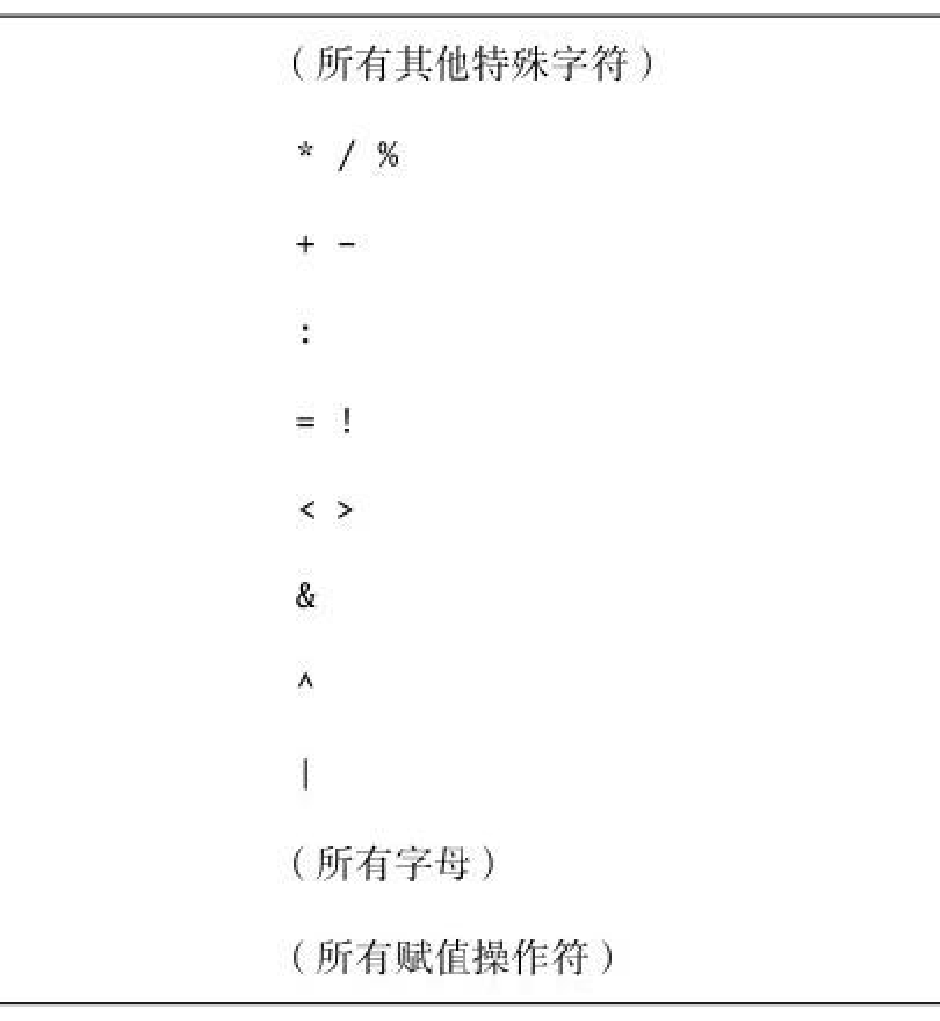
表5.3显示了方法首字符的优先级顺序，依次递减，位于同一行的拥有同样的优先级。在表格中某个字符的优先级越高，那么以这个字符打头的方法就拥有更高的优先级。如下例子展示了优先级的影响：

In [ ]:
2 << 2 + 2

<<方法以字符<打头，在表5.3中，<出现在字符+的下方，因此表达式会先调用+方法，然后是<<方法，即 2 << （2 + 2）。我们按数学计算，2 +2得4,2 << 4得32。如果将这两个操作交换一下次序，将会得到不同的结果：

In [ ]:
2 + 2 << 2

由于方法的首字符跟前一例一样，方法将会按照相同的顺序调用。先是+方法，然后是<<方法。因此2 + 2得4，而4 << 2得16。

前面提到过，优先级规则的一个例外是赋值操作符（assignment operator），这些操作符以等号（=）结尾，且不是比较操作符（<=、>=、==或！=），它们的优先级跟简单的赋值（=）拥有的优先级一样。也就是说，比其他任何操作符都低。例如：

In [ ]:
var x = 3
val y = 4
x *= y + 1

跟如下代码是一样的：

In [ ]:
x *= (y + 1)

因为*=被归类为赋值操作符，而赋值操作符的优先级比+低，尽管它的首字符是*，看上去应该比+的优先级更高。

当多个同等优先级的操作符并排在一起时，操作符的结合性（associativity）决定了操作符的分组。Scala中操作符的结合性由操作符的最后一个字符决定。正如我们在第3章提到的，任何以“:”字符结尾的方法都是在它右侧的操作元上调用的，传入左侧的操作元。以任何其他字符结尾的方法则相反：它们是在左侧的操作元上调用，传入右侧的操作元。因此 a * b 交出a.*（b），而a :::b将交出b.:::（a）。

不过，不论操作符的结合性是哪一种，它的操作元都是从左到右被求值的。因此如果a不是一个简单的引用某个不可变值的表达式，那么a ::: b更准确地说是被当作如下的代码块：
```
{val x = a; b.:::(x)}
```
在这个代码块中，a仍然先于b被求值，然后这个求值结果被作为操作元传入b的方法。

这个结合性规则在相同优先级的操作符并排出现时也有相应的作用。如果方法名以“:”结尾，它们会被从右向左依次分组；否则，它们会被从左向右依次分组。例如 被当作，而 a * b * c则被当作 （a * b） * c。

操作符优先级是Scala语言的一部分，在使用时你不需要过于担心。话虽如此，一个好的编码风格是清晰地表达出什么操作符被用在什么表达式上。也许唯一你可以真正放心让其他程序员能够不查文档就能知道的优先级规则是，乘法类的操作符（*、/、%）比加法类的操作符（+、-）拥有更高的优先级。因此，尽管 a + b << c在不加任何圆括号的情况下，交出你想要的结果，把表达式写成（a + b） << c带来的额外的清晰效果，可能会减少别人用操作符表示法对你表达不满的频率，比如愤懑地大声说这是“bills !*&^%～ code!”。[8]

## 5.10 富包装类
相比前面几节讲到的，还可以对Scala的基础类型调用更多的方法，表5.4给出了一些例子。这些方法可以通过隐式转换（implicit conversion）得到，关于隐式转换的技巧，会在第21章详细介绍。你当下需要知道的是，本章提到的每个基础类型，都有一个对应的“富包装类”，提供了额外的方法。要了解基础类型的所有方法，你应该去看一下每个基础类型的富包装类的API文档。表5.5列出了这些富包装类。
## 5.11 结语
本章主要想告诉你的是Scala的操作符其实是方法调用，以及Scala的基础类型可以被隐式转换成富包装类，从而拥有更多实用的方法。在下一章，我们将向你展示什么叫作用函数式的风格设计对象，并相应地给出本章你看到的某些操作符的全新实现。

表5.4 一些富操作
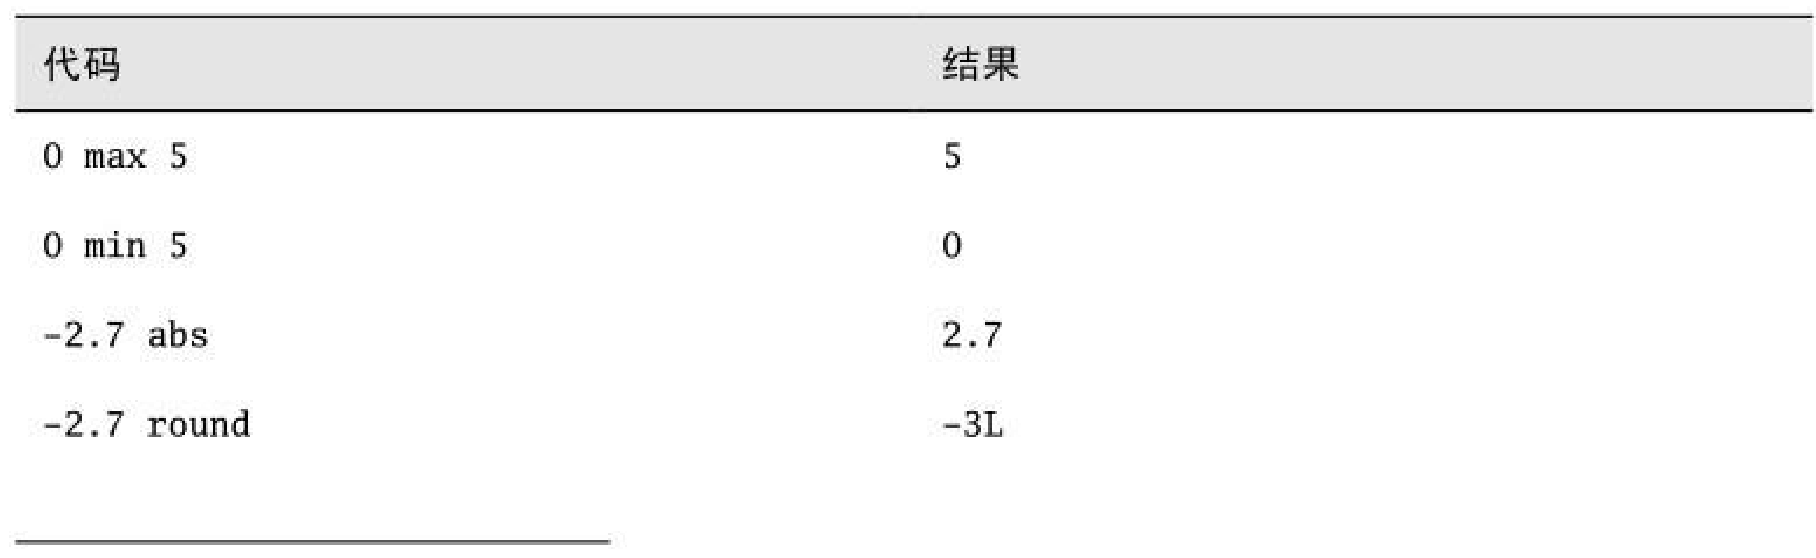
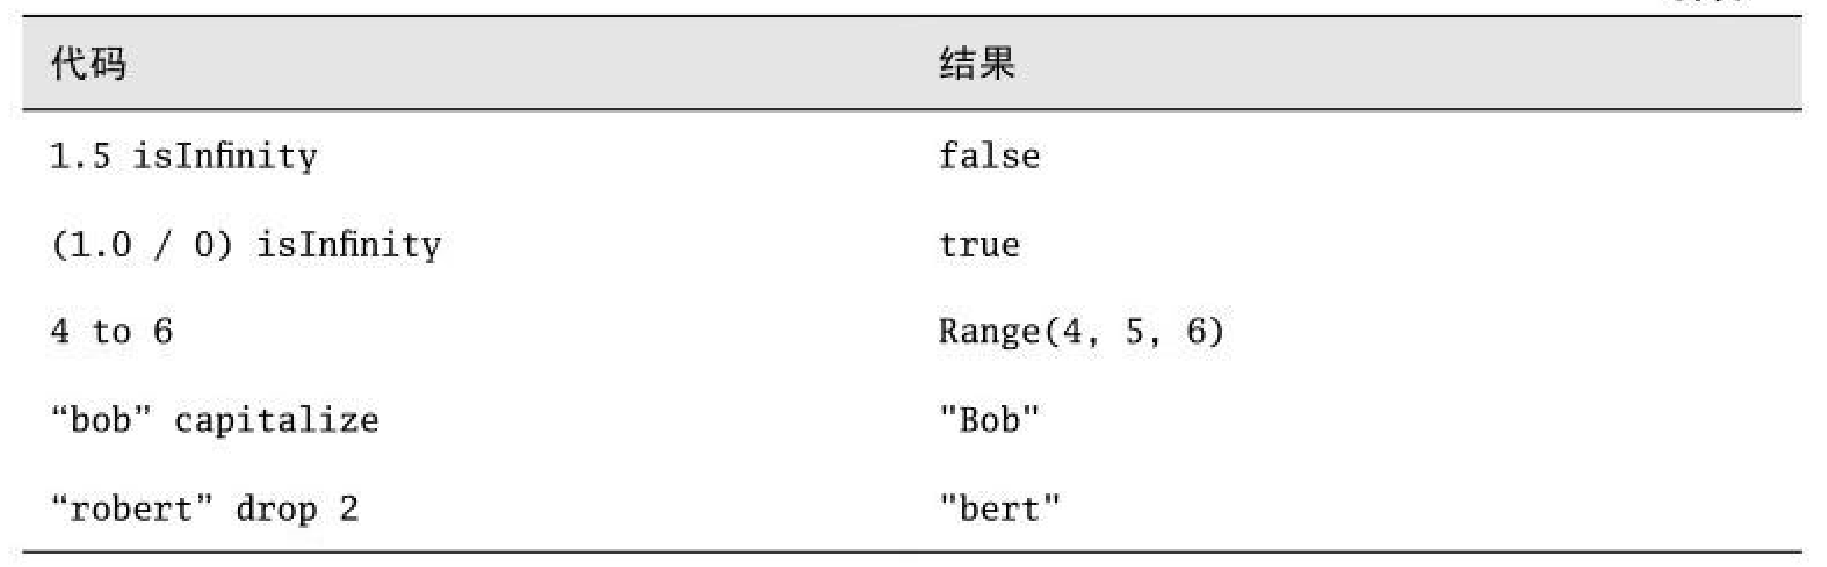

表5.5 富包装类
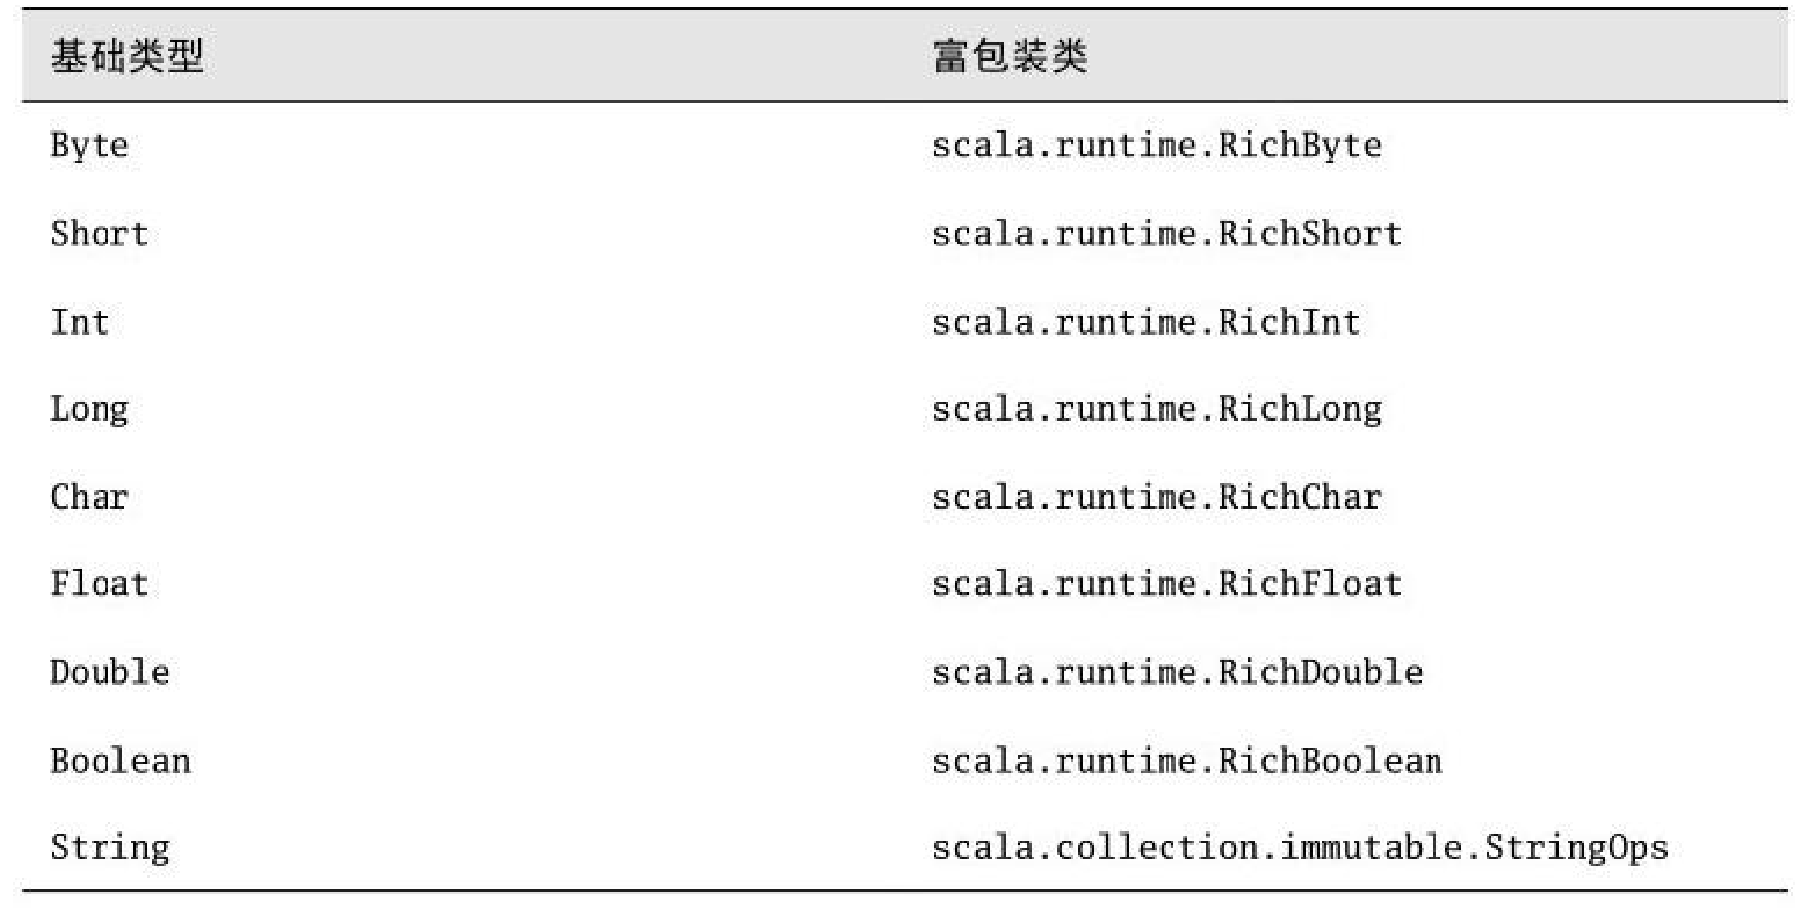

[1].包（package）这个概念在第2章的第1步简单介绍过，会在第13章中详细介绍。  
[2].所谓内部化，可以参考Java对Long对象的处理，最常用的-128L～127L会被内部化，即重用对象而不是新建。——译者注  
[3].重载的方法名字相同但参数类型不同。重载方法在6.11节会有更详细的介绍。  
[4].不过这并不是世界末日，还存在一个非常小的概率你的*p会被当作C++那样正常编译。  
[5].按位异或方法对其操作元执行异或操作，相同的位交出0，不同的位交出1。因此0011^0101交出0110。  
[6].整数类型最左边的位是符号位。如果最左边的一位是0，那么这个数就是负数；如果是1，则这个数是正数。  
[7].自动检查并不会关心右边是否为null，不过任何讲道理的equals方法都应该对入参为null的情况返回false。  
[8].至此你应该知道，Scala编译器会把这段代码翻译成 （bills.!*&^%～（code））.!（）（英文语境下这种表示法常用于替代脏话—译者注）。